#Task 1

In [3]:

#importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
%matplotlib inline
pd.set_option('display.max_columns',5)


**Data-Assessing**

In [4]:
df=pd.read_csv('Nat_Gas.csv')
print(df.shape)

(48, 2)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [6]:
df.sample(10)

,Dates,Prices
14,12/31/21,11.4
20,6/30/22,10.4
30,4/30/23,11.5
36,10/31/23,11.8
10,8/31/21,10.3
26,12/31/22,11.6
15,1/31/22,11.5
35,9/30/23,11.5
6,4/30/21,10.4
46,8/31/24,11.5


In [7]:
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [8]:
df.tail()

,Dates,Prices
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6
46,8/31/24,11.5
47,9/30/24,11.8


In [9]:
df.isnull().sum().sort_values(ascending=True)

,0
Dates,0
Prices,0


In [10]:
df.describe().T

,count,mean,...,75%,max
Prices,48.0,11.207083,...,11.625,12.8


**Data-Cleaning**

In [11]:
df['Dates'] = pd.to_datetime(df['Dates'])
df

,Dates,Prices
0,2020-10-31,10.10
1,2020-11-30,10.30
2,2020-12-31,11.00
3,2021-01-31,10.90
4,2021-02-28,10.90
5,2021-03-31,10.90
6,2021-04-30,10.40
7,2021-05-31,9.84
8,2021-06-30,10.00
9,2021-07-31,10.10


In [12]:
df.set_index('Dates', inplace=True)
df.sample(10)

,Prices
Dates,
2021-04-30,10.4
2023-10-31,11.8
2022-07-31,10.5
2022-08-31,10.4
2021-03-31,10.9
2023-04-30,11.5
2020-11-30,10.3
2021-08-31,10.3
2023-01-31,12.1


**EDA**

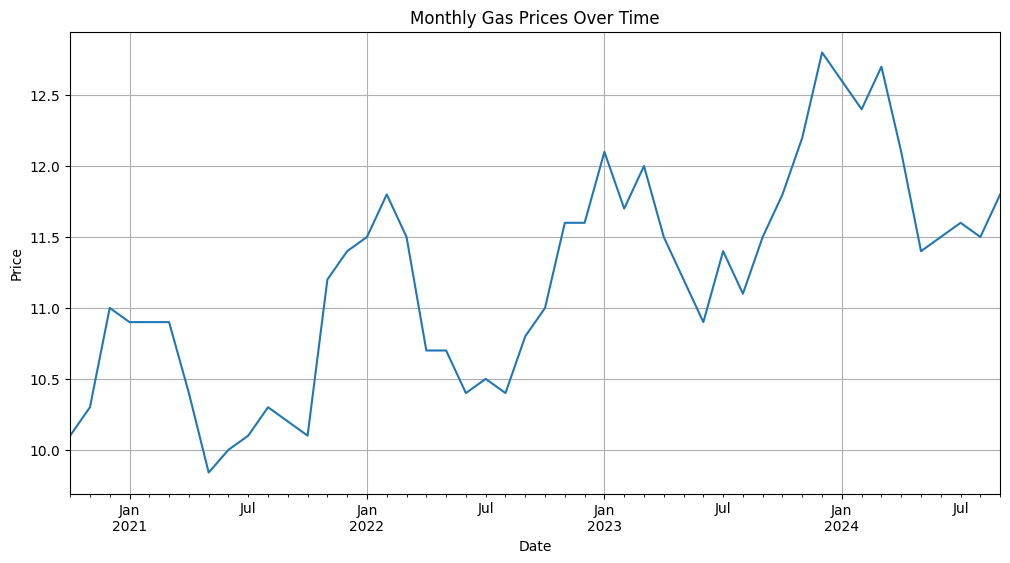

In [13]:


df['Prices'].plot(figsize=(12, 6), title="Monthly Gas Prices Over Time")
plt.ylabel("Price")
plt.xlabel("Date")
plt.grid(True)
plt.show()


<Axes: xlabel='Prices', ylabel='Count'>

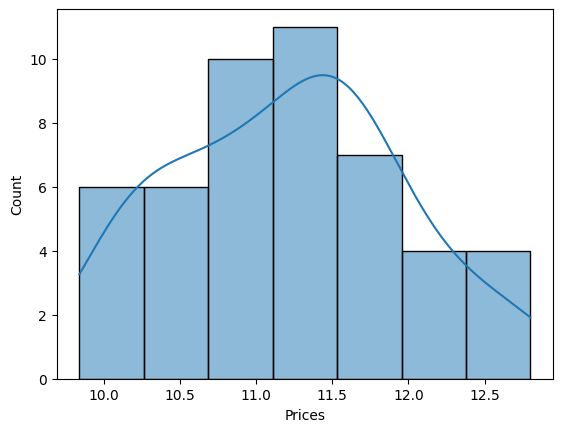

In [14]:
#analysing skewed, normally distributed, or has outliers.
sns.histplot(df['Prices'], kde=True)


<Axes: xlabel='Dates'>

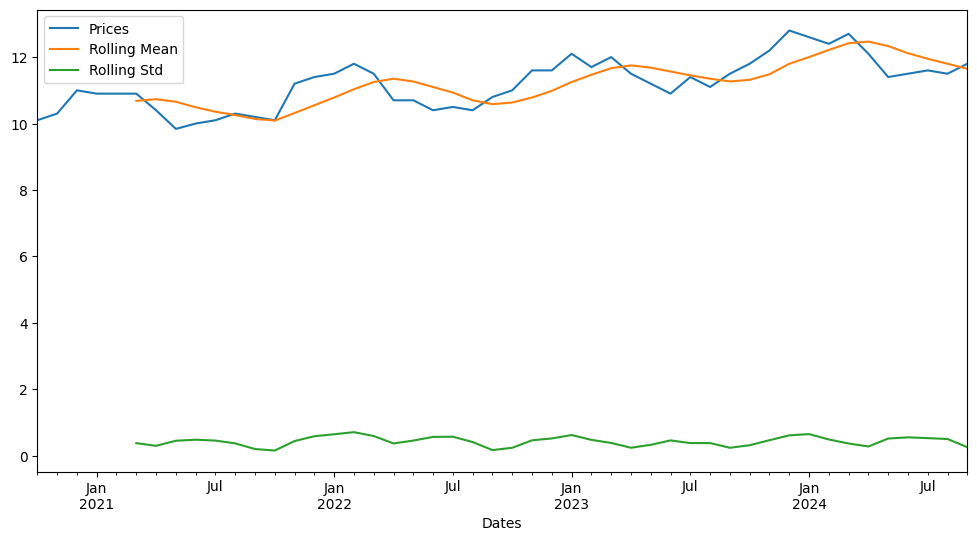

In [15]:
df['Rolling Mean'] = df['Prices'].rolling(window=6).mean()
df['Rolling Std'] = df['Prices'].rolling(window=6).std()
df[['Prices', 'Rolling Mean', 'Rolling Std']].plot(figsize=(12,6))


- The rolling mean (orange line) is increasing slowly over time, So your data is non-stationary in mean


- The rolling std (green line) stays fairly flat and low throughout,volatility (variance) is constant over time.  Data is stationary in variance





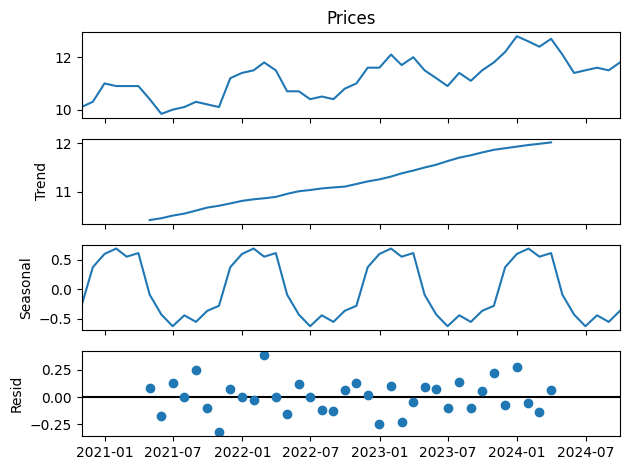

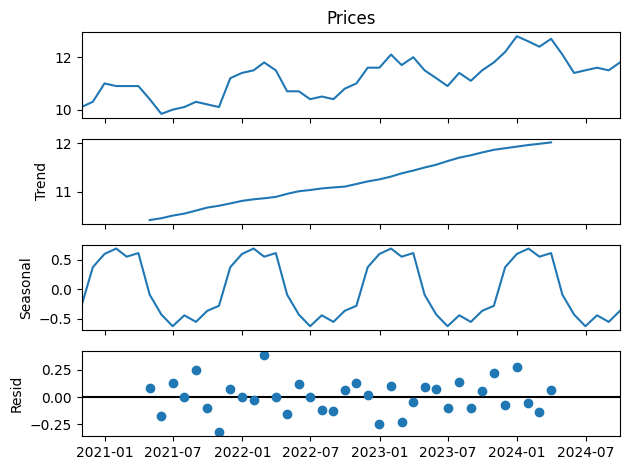

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Prices'], model='additive', period=12)
result.plot()


*we have both seasonality and trend so we shall focus on buliding a sarima model*

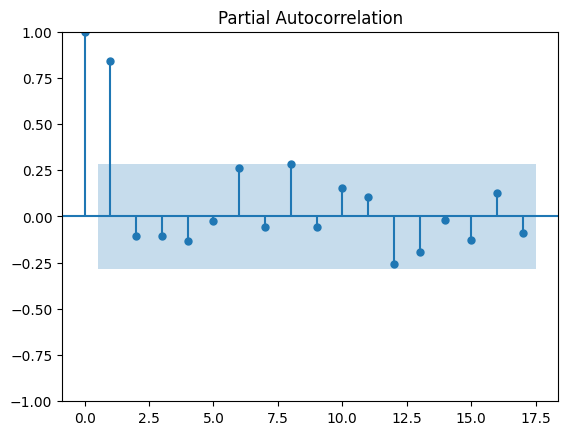

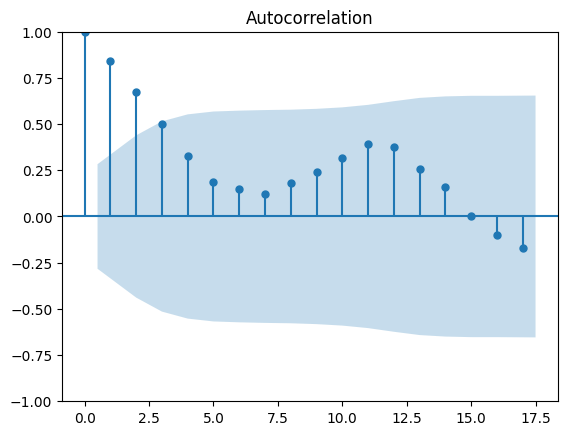

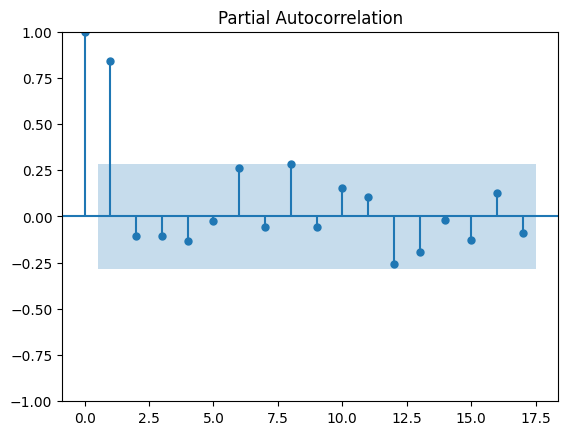

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Prices'])
plot_pacf(df['Prices'])


In [18]:
# Null hypothesis (H0): Data is stationary
# Alternative hypothesis (H1) : Data is non-stationary

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Prices'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 0.21807686169999427
p-value: 0.973257438844869


p-value = 0.973

→ much greater than 0.05
 So we fail to reject the null hypothesis -> Data is non-stationary

**Model-Building**

In [19]:
#To identify the best combination of (p,d,q), please run the last part of this code (Hyperparameter-Tuning)

In [20]:
size = int(len(df) * 0.8)

train = df.iloc[:size]
test = df.iloc[size:]

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Pass only the target column (univariate series)
model = SARIMAX(train['Prices'],
                order=(2, 0, 0),
                seasonal_order=(0, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False).fit()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [22]:
pred = model.predict(start=len(train), end=(len(df)-1))

In [23]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(test['Prices'], pred))

print(f"RMSE: {error:.3f}")


RMSE: 0.180


In [24]:
(test.mean(),np.sqrt(test.var()))

(Prices          12.040000
 Rolling Mean    12.075000
 Rolling Std      0.478728
 dtype: float64,
 Prices          0.548128
 Rolling Mean    0.281229
 Rolling Std     0.133552
 dtype: float64)

*The RMSE of  SARIMA model on the test set is 0.18, which is significantly lower than the standard deviation of the test data (0.55). This indicates that the model predicts much more accurately than simply using the average value. Additionally, the RMSE is only about 1.5% of the mean test value (12.04), demonstrating that the model’s forecast errors are very small relative to the typical scale of the data. Overall, these results suggest that the model performs well on the test set*

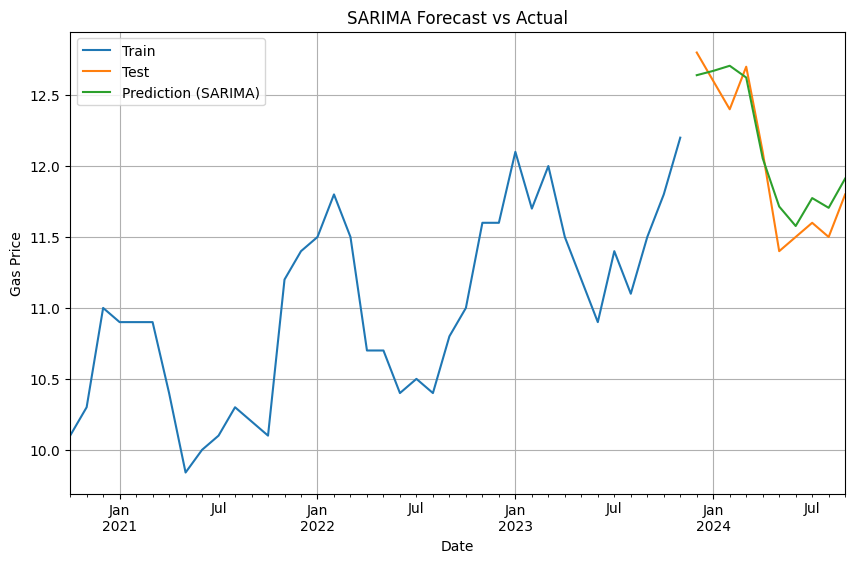

In [25]:
plt.figure(figsize=(10, 6))

train['Prices'].plot(label='Train', legend=True)
test['Prices'].plot(label='Test', legend=True)
pred.plot(label='Prediction (SARIMA)', legend=True)

plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Gas Price")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


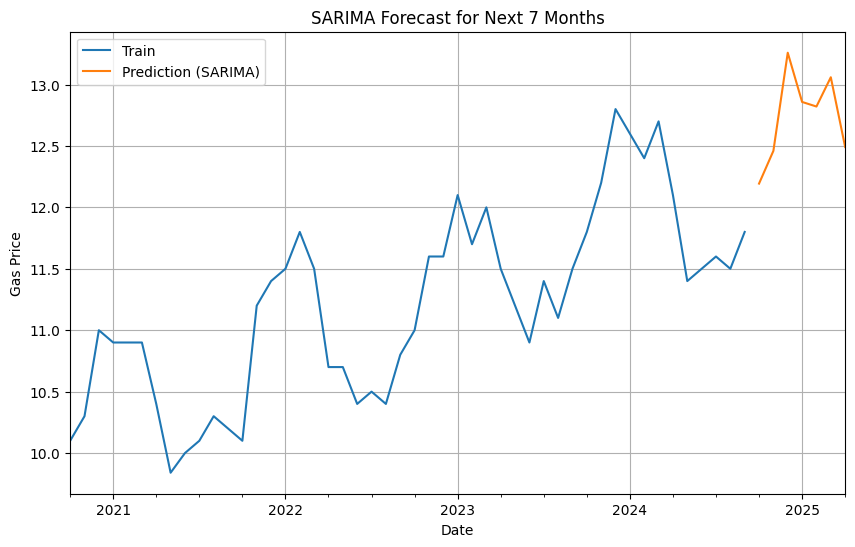

In [26]:
# Fit SARIMA on full dataset
final_model = SARIMAX(df['Prices'],
                      order=(5, 0, 4),
                      seasonal_order=(1, 1, 1, 12),  # <-- adjust if needed
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()

# Forecast next 7 months
prediction = final_model.predict(start=len(df), end=len(df)+6)

# Plot original data + prediction
plt.figure(figsize=(10, 6))
df['Prices'].plot(label='Train', legend=True)
prediction.plot(label='Prediction (SARIMA)', legend=True)

plt.title("SARIMA Forecast for Next 7 Months")
plt.xlabel("Date")
plt.ylabel("Gas Price")
plt.grid(True)
plt.show()












**Extrapolate it for one year into the future**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


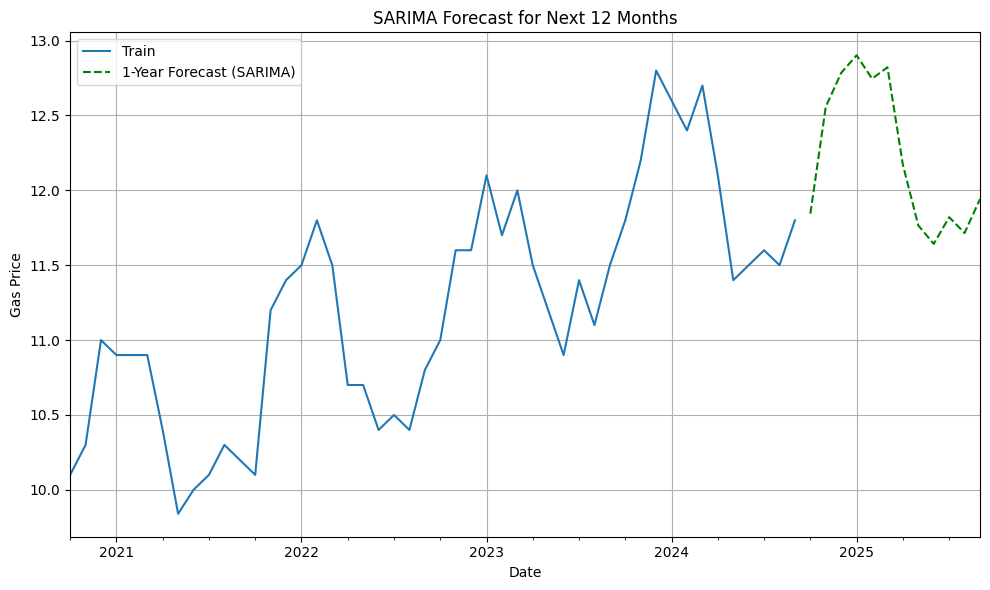

In [27]:


# Fit SARIMA on full dataset
final_model = SARIMAX(df['Prices'],
                      order=(2, 0, 0),
                      seasonal_order=(0, 1, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()

# Forecast next 12 months
forecast_steps = 12
prediction = final_model.get_forecast(steps=forecast_steps)
forecast_values = prediction.predicted_mean

# Create future date index
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_values.index = future_dates

# Plot original + forecasted values
plt.figure(figsize=(10, 6))
df['Prices'].plot(label='Train', legend=True)
forecast_values.plot(label='1-Year Forecast (SARIMA)', legend=True, linestyle='--', color='green')

plt.title("SARIMA Forecast for Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Gas Price")
plt.grid(True)
plt.tight_layout()
plt.show()


**take a date as input and return a price estimate**

In [28]:
def predict_price_for_date(input_date_str):
    input_date = pd.to_datetime(input_date_str)
    input_year = input_date.year
    input_month = input_date.month

    for date in forecast_values.index:
        if date.year == input_year and date.month == input_month:
            price = forecast_values[date]
            print(f"📅 Predicted Gas Price on {date.strftime('%B %Y')} is ₹{price:.2f}")
            return price

    print("❌ Date is not in forecast range. Try a date within the next 12 months.")
    return None


In [29]:
predict_price_for_date("2025-09-30")
predict_price_for_date("2024-10-30")

📅 Predicted Gas Price on September 2025 is ₹11.94
📅 Predicted Gas Price on October 2024 is ₹11.84


np.float64(11.844039727145727)

#Task2

In [36]:
def value_gas_storage_contract(injection_dates, withdrawal_dates, price_series,
                                injection_rate, withdrawal_rate, max_volume, storage_cost_per_unit):
    storage = 0
    cash_flow = 0

    injection_dates = pd.to_datetime(injection_dates)
    withdrawal_dates = pd.to_datetime(withdrawal_dates)

    for date in price_series.index:
        price = price_series.loc[date]

        # Inject if it's an injection date
        if date in injection_dates:
            amount = min(injection_rate, max_volume - storage)
            cash_flow -= amount * price  # Buy gas
            storage += amount

        # Withdraw if it's a withdrawal date
        elif date in withdrawal_dates:
            amount = min(withdrawal_rate, storage)
            cash_flow += amount * price  # Sell gas
            storage -= amount

        # Storage cost applies every period
        cash_flow -= storage * storage_cost_per_unit

    return round(cash_flow, 2)


In [37]:
# Sample forecasted prices (replace with real forecast)
sample_index = pd.date_range(start="2024-10-31", periods=12, freq='M')
sample_prices = pd.Series([11.2, 11.0, 10.8, 10.5, 10.7, 11.0, 11.3, 11.5, 11.8, 12.0, 12.2, 12.4], index=sample_index)

# Define inputs
injection_dates = ["2024-10-31", "2024-11-30", "2024-12-31"]
withdrawal_dates = ["2025-07-31", "2025-08-31", "2025-09-30"]

# Run the contract valuation
contract_value = value_gas_storage_contract(
    injection_dates=injection_dates,
    withdrawal_dates=withdrawal_dates,
    price_series=sample_prices,
    injection_rate=10,
    withdrawal_rate=10,
    max_volume=30,
    storage_cost_per_unit=0.05
)

print(f"📦 Estimated Contract Value: ₹{contract_value}")


📦 Estimated Contract Value: ₹22.5


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

##############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Hyperparameter Tunning**
   
   
   
   ACF/PACF plots are some traditional methods of obtaining(p,d,q), and are sometimes misleading. Hence, we need to perform hyper-parameter optimization steps in time series analysis to get optimum values of (p,d,q)

In [30]:
import itertools

In [31]:
# Define parameter ranges
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
s = 12  # Monthly seasonality

In [32]:
# Generate all parameter combinations
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, [s]))

In [33]:
# Initialize result trackers
rmse = []
order_list = []
seasonal_order_list = []

# Create train/test split
train_size = int(len(df) * 0.8)
train, test = df['Prices'][:train_size], df['Prices'][train_size:]

In [34]:
# Loop through each combination
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            pred = model_fit.predict(start=len(train), end=len(df['Prices']) - 1)
            error = np.sqrt(mean_squared_error(test, pred))

            # Append results
            rmse.append(error)
            order_list.append(param)
            seasonal_order_list.append(seasonal_param)

        except Exception as e:
            continue

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

In [35]:

# Create DataFrame of results
results = pd.DataFrame({
    'Order': order_list,
    'Seasonal_Order': seasonal_order_list,
    'RMSE': rmse
}).sort_values('RMSE')

# Display best models
print(results.head())

        Order Seasonal_Order      RMSE
99  (2, 0, 0)  (0, 1, 1, 12)  0.179573
53  (1, 0, 0)  (1, 0, 1, 12)  0.210851
5   (0, 0, 0)  (1, 0, 1, 12)  0.214796
13  (0, 0, 1)  (1, 0, 1, 12)  0.223470
35  (0, 1, 1)  (0, 1, 1, 12)  0.230098
